## 신경망과의 첫 만남
* 흑백 손글씨 숫자 이미지(28*28)를 10개(0~9)개의 범주로 분류하기

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
train_labels,test_labels

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [ ]:
### 네트워크가 이미지와 라벨을 연관시킬 수 있도록 학습
### test_set에서 예측을 네트워크에 요청 -> test_labels와 비교하여 맞는지 확인

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
## 층이란? 데이터를 위한 필터의 역할 (층을 통과하면서, 더욱 유용한 데이터 형태로 추출). 점진적으로 데이터를 정제

model = keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# 두 개의 신경망 층
# 소프트맥스는 10개로 분류하는 각 확률값을 반환(다 더하면 1)


In [ ]:
model.compile(optimizer="rmsprop",
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"])

* 데이터를 모델에 맞는 크기로 변환. 0과 1 사이로 스케일링

In [ ]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255

In [ ]:
model.fit(train_images,train_labels,epochs=10,batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8539 - loss: 0.5467
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8660 - loss: 0.4921
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8745 - loss: 0.4514
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8801 - loss: 0.4243
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8879 - loss: 0.4019
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8902 - loss: 0.3892
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8931 - loss: 0.3780
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8977 - loss: 0.3633
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8981 - loss: 0.3571
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8985 - loss: 0.3566


In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.99999994, 0.        , 0.        ],
      dtype=float32)

In [ ]:
test_labels[0]

7

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f"테스트 정확도:{test_acc}")

# 트레인-테스트의 차이 -> 과대적

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7900 - loss: 51.2435
테스트 정확도:0.8102999925613403


### 매니폴드란
* 매니폴드는 데이터가 있는 공간.데이터는 다양한 차원에서 존재할 수 있는데, 이 차원을 축소시켜서 작은 차원으로 데이터를 보게 되면, 필요한 매개변수가 적어져 분류가 쉬워질 수 있다.

* 데이터의 차원을 줄이는 것에 대해 보기 전에, 매니폴드에 대한 가정(manifold hypothesis)을 볼 필요가 있다.
* 매니폴드 가정에서 말하는 것은, 데이터가 고차원이라도 이 집합을 포함하는 저차원의 매니폴드가 있다는 것이다. 즉, 데이터가 고차원이라도 저차원의 매니폴드 상에 위치할 수 있으며, 그 낮은 차원의 매니폴드를 벗어나면 밀도가 낮아진다는 것.
    * [출처] 매니폴드(manifold)란 뭘까?|작성자 잘먹잘살

### 텐서 연산

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [ ]:
def naive_relu(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

In [ ]:

# x = np.random.random((200,100))
# y = np.random.random((200,100))

# import numpy as np

# z = x+y
# z = np.maximum(z,0.)

# import time

# t0 =time.time
# for _ in range(1000):
#     z = x+y
#     z = np.maximum(z,0.)
# print(f" 걸린 시간 : {0:.2f} s".format(time.time()-t0))

* 브로드 캐스팅(크기가 다른 두 텐서가 더해질 때 : 작은 텐서가 큰 텐서에 맞춤)
    * 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가
    * 작은 텐서가 새 축을 따라서, 큰 텐서의 크기에 맞도록 반복

## 3.5 텐서플로



In [ ]:
import numpy as np
import tensorflow as tf
x = tf.ones(shape=(2,2))
x
# 튜플처럼 변경 불가

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.6403807],
       [-1.237736 ],
       [ 1.5558155]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result,input_var)
gradient
# gradient = tape.gradient(loss,weight)
# 기본적으로 훈련 가능한 변수만 추적

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
# 상수 텐서 입력

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result,input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9*time**2
    speed = inner_tape.gradient(position,time)
accelration = outer_tape.gradient(speed,time)
print(accelration)

tf.Tensor(9.8, shape=(), dtype=float32)


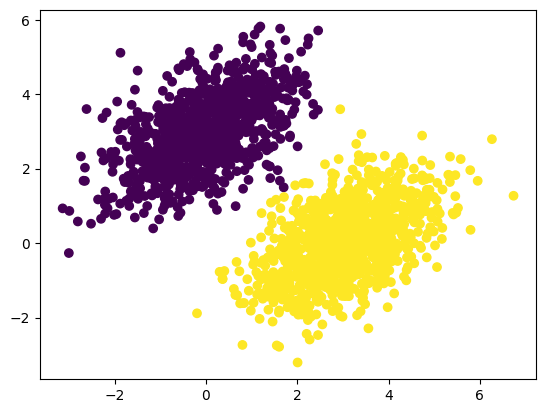

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),
                     np.ones((num_samples_per_class,1),dtype="float32")))

import matplotlib.pyplot as plt

plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs,W) + b


def square_loss(targets,predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets,predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss
for step in range(40):
    loss = training_step(inputs,targets)
    print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 4.1163
1번째 스텝의 손실 : 0.3393
2번째 스텝의 손실 : 0.1482
3번째 스텝의 손실 : 0.1177
4번째 스텝의 손실 : 0.1072
5번째 스텝의 손실 : 0.0997
6번째 스텝의 손실 : 0.0931
7번째 스텝의 손실 : 0.0870
8번째 스텝의 손실 : 0.0815
9번째 스텝의 손실 : 0.0765
10번째 스텝의 손실 : 0.0719
11번째 스텝의 손실 : 0.0677
12번째 스텝의 손실 : 0.0639
13번째 스텝의 손실 : 0.0604
14번째 스텝의 손실 : 0.0572
15번째 스텝의 손실 : 0.0543
16번째 스텝의 손실 : 0.0516
17번째 스텝의 손실 : 0.0492
18번째 스텝의 손실 : 0.0470
19번째 스텝의 손실 : 0.0449
20번째 스텝의 손실 : 0.0431
21번째 스텝의 손실 : 0.0414
22번째 스텝의 손실 : 0.0398
23번째 스텝의 손실 : 0.0384
24번째 스텝의 손실 : 0.0371
25번째 스텝의 손실 : 0.0359
26번째 스텝의 손실 : 0.0348
27번째 스텝의 손실 : 0.0338
28번째 스텝의 손실 : 0.0329
29번째 스텝의 손실 : 0.0321
30번째 스텝의 손실 : 0.0313
31번째 스텝의 손실 : 0.0307
32번째 스텝의 손실 : 0.0300
33번째 스텝의 손실 : 0.0295
34번째 스텝의 손실 : 0.0289
35번째 스텝의 손실 : 0.0284
36번째 스텝의 손실 : 0.0280
37번째 스텝의 손실 : 0.0276
38번째 스텝의 손실 : 0.0272
39번째 스텝의 손실 : 0.0269


# **4장**


## **4-1. 영화 리뷰(이진 분류)**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [ ]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]]
)

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.49904

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="relu")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5863 - loss: 0.9911 - val_accuracy: 0.8019 - val_loss: 0.4440
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8258 - loss: 0.3987 - val_accuracy: 0.8678 - val_loss: 0.3945
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9124 - loss: 0.2717 - val_accuracy: 0.8800 - val_loss: 0.4203
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9359 - loss: 0.2094 - val_accuracy: 0.8825 - val_loss: 0.4476
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9526 - loss: 0.1750 - val_accuracy: 0.8808 - val_loss: 0.5686
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9588 - loss: 0.1493 - val_accuracy: 0.8739 - val_loss: 0.5945
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9753 - loss: 0.1217 - val_accuracy: 0.8774 - val_loss: 0.6492
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9803 - loss: 0.1047 - val_accuracy: 0.8783 - v

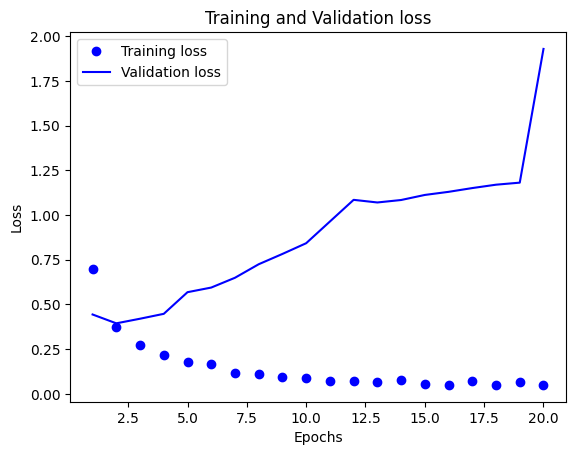

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training loss")
plt.plot(epochs,val_loss_values,"b",label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

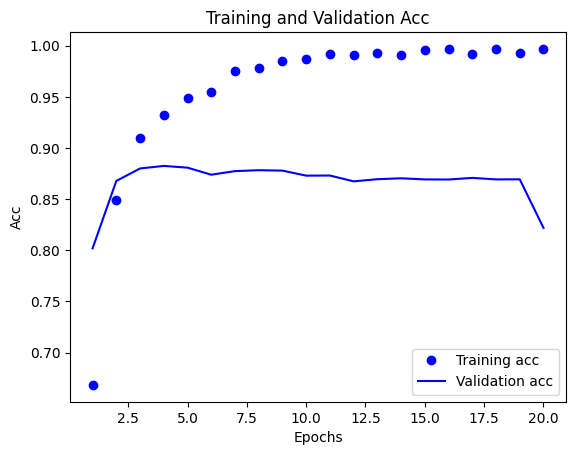

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="relu")
])

model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5,batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6441 - loss: 0.9440
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8934 - loss: 0.3223
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9346 - loss: 0.2469
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9540 - loss: 0.2006
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9614 - loss: 0.1771
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8765 - loss: 0.6539


In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.10548238],
       [2.5666358 ],
       [1.2890282 ],
       ...,
       [0.14093669],
       [0.11365195],
       [0.4927563 ]], dtype=float32)

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="relu")
])
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6068 - loss: 0.8937 - val_accuracy: 0.8043 - val_loss: 0.4161
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8764 - loss: 0.3486 - val_accuracy: 0.8544 - val_loss: 0.3768
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9174 - loss: 0.2347 - val_accuracy: 0.8743 - val_loss: 0.5363
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9499 - loss: 0.1665 - val_accuracy: 0.8856 - val_loss: 0.4813
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9661 - loss: 0.1308 - val_accuracy: 0.8849 - val_loss: 0.5690


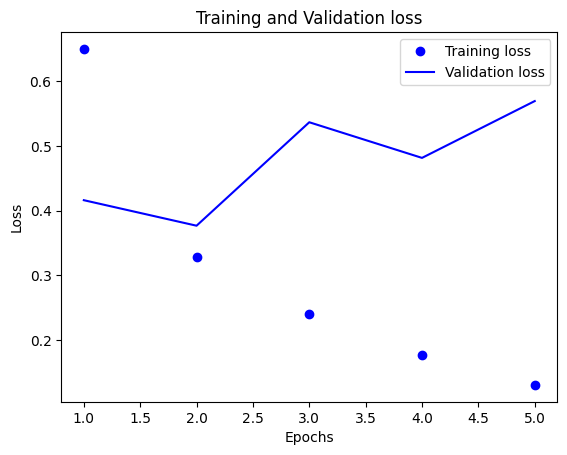

In [ ]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,"bo",label="Training loss")
plt.plot(epochs,val_loss_values,"b",label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

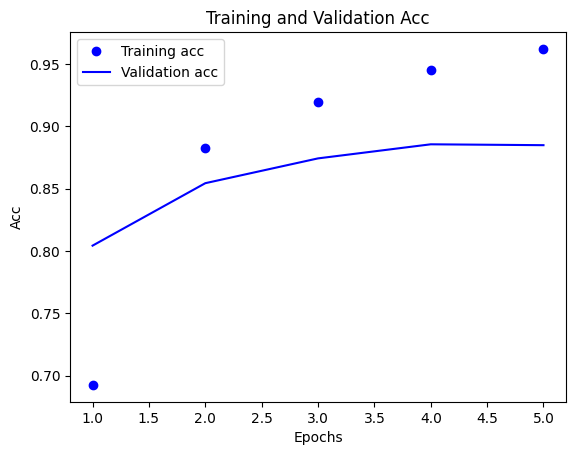

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and Validation Acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

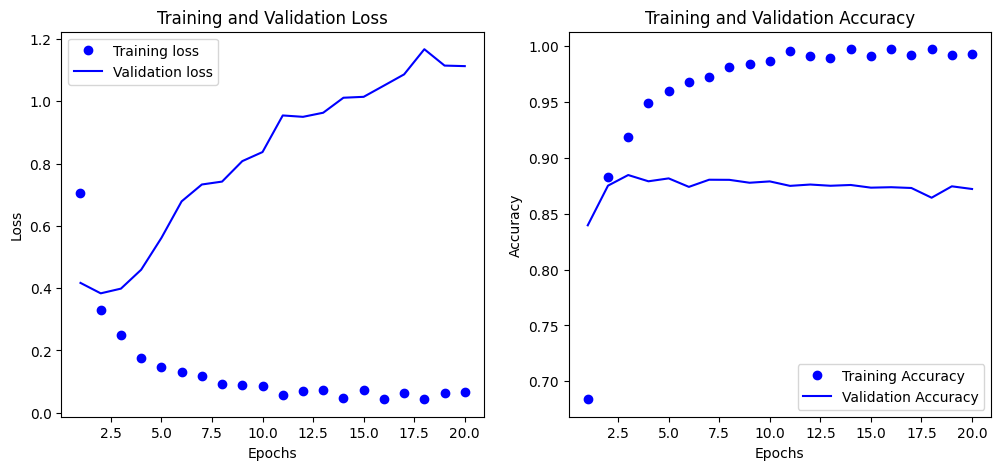

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)

# 가로로 두 그래프 그리기
plt.figure(figsize=(12, 5))  # 그래프 크기 조정

# 첫 번째 그래프: Training and Validation loss
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 두 번째 그래프: Training and Validation Accuracy
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

## **4.2. 다중 분류**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

3

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3915 - loss: 3.2008 - val_accuracy: 0.5950 - val_loss: 1.8907
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6224 - loss: 1.7363 - val_accuracy: 0.6620 - val_loss: 1.4408
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7164 - loss: 1.2897 - val_accuracy: 0.7210 - val_loss: 1.2446
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7738 - loss: 1.0414 - val_accuracy: 0.7150 - val_loss: 1.1627
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.8076 - loss: 0.8905 - val_accuracy: 0.7800 - val_loss: 1.0258
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8401 - loss: 0.7337 - val_accuracy: 0.8010 - val_loss: 0.9614
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8711 - loss: 0.6082 - val_accuracy: 0.8080 - val_loss: 0.9227
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8865 - loss: 0.5436 - val_accuracy: 0.8040 -

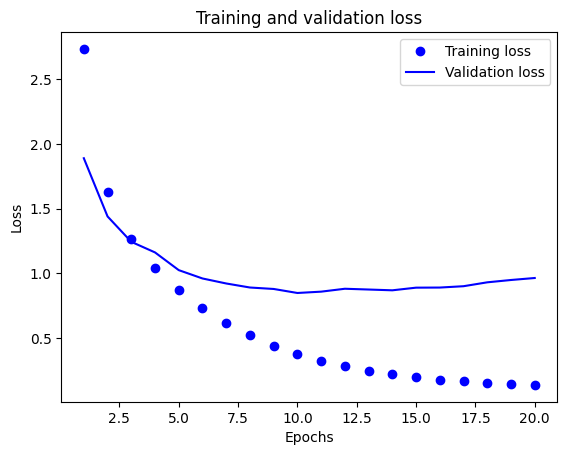

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

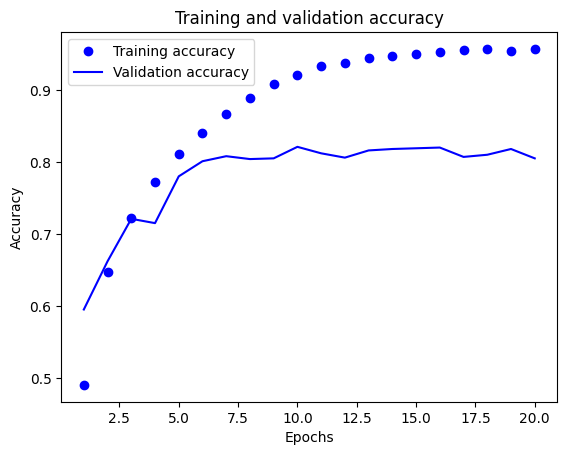

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.3366 - loss: 3.1805
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6487 - loss: 1.6193
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7285 - loss: 1.2281
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7883 - loss: 0.9988
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8217 - loss: 0.8422
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8533 - loss: 0.6932
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8838 - loss: 0.5647
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9034 - loss: 0.4695
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9121 - loss: 0.4133
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9236 - loss: 0.3458
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7800 - loss: 0.9580


In [ ]:
results

[0.9824337363243103, 0.7738201022148132]

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4523 - loss: 2.8988
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7015 - loss: 1.3618
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7739 - loss: 1.0250
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8340 - loss: 0.7676
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8640 - loss: 0.6402
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8971 - loss: 0.4906
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9119 - loss: 0.3984
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9288 - loss: 0.3323
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9412 - loss: 0.2659
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.9492 - loss: 0.2220
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 1.0742


In [ ]:
results

[1.0898916721343994, 0.7537844777107239]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.17542297417631345

In [ ]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


## **4.3**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape,test_data.shape

((404, 13), (102, 13))

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
all_scores

[2.0774166584014893, 2.3468475341796875, 2.420074701309204, 2.476958990097046]

In [ ]:
np.mean(all_scores)

2.3303244709968567

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

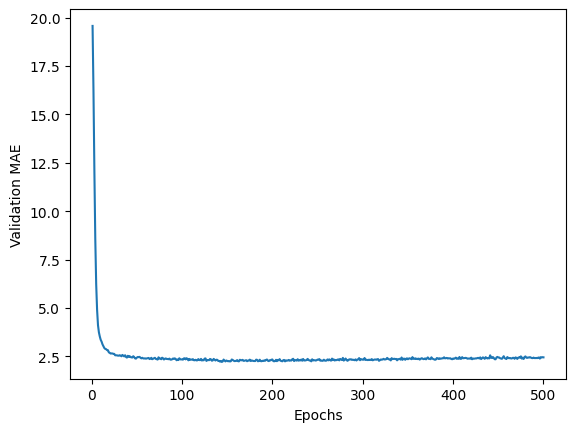

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

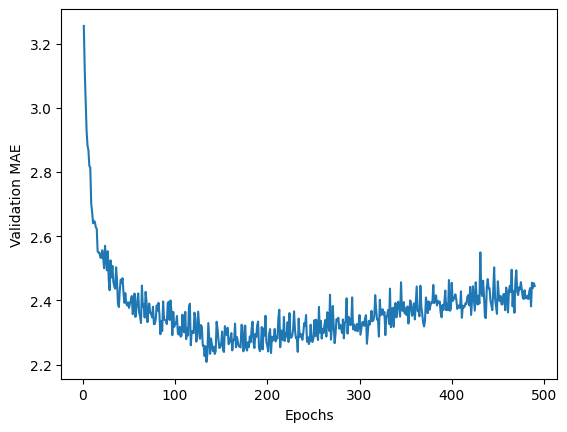

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=120, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.3728 - mae: 2.4845 


In [ ]:

test_mae_score

2.6634626388549805

In [ ]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([9.965707], dtype=float32)

In [ ]:
I